### This notebook is optionally accelerated with a GPU runtime.
### If you would like to use this acceleration, please select the menu option "Runtime" -> "Change runtime type", select "Hardware Accelerator" -> "GPU" and click "SAVE"

----------------------------------------------------------------------

# ResNet

*Author: Pytorch Team*

**Deep residual networks pre-trained on ImageNet**

<img src="https://pytorch.org/assets/images/resnet.png" alt="alt" width="50%"/>

In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet34', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet152', pretrained=True)
model.eval()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/NMA_DL_2022/ML_dis_mat_stimuli

/content/gdrive/My Drive/NMA_DL_2022/ML_dis_mat_stimuli


In [ ]:
model_new_1 = torch.nn.Sequential(*list(model.children()))[:-2]
model_new_1.eval()

## ref

In [8]:
# get the pictures to be analyzed
import glob
f_ref = glob.glob('ref/*.png')
f_ref.sort()

In [9]:
f_ref

['ref/ref_100_0.1.png',
 'ref/ref_100_0.11.png',
 'ref/ref_100_0.12.png',
 'ref/ref_100_0.13.png',
 'ref/ref_100_0.14.png',
 'ref/ref_100_0.15.png',
 'ref/ref_100_0.16.png',
 'ref/ref_100_0.17.png',
 'ref/ref_100_0.18.png',
 'ref/ref_100_0.19.png',
 'ref/ref_100_0.2.png',
 'ref/ref_100_0.21.png',
 'ref/ref_100_0.22.png',
 'ref/ref_100_0.23.png',
 'ref/ref_100_0.24.png',
 'ref/ref_100_0.25.png',
 'ref/ref_100_0.26.png',
 'ref/ref_100_0.27.png',
 'ref/ref_100_0.28.png',
 'ref/ref_100_0.29.png',
 'ref/ref_100_0.3.png',
 'ref/ref_100_0.31.png',
 'ref/ref_100_0.32.png',
 'ref/ref_100_0.33.png',
 'ref/ref_100_0.34.png',
 'ref/ref_100_0.35.png',
 'ref/ref_100_0.36.png',
 'ref/ref_100_0.37.png',
 'ref/ref_100_0.38.png',
 'ref/ref_100_0.39.png',
 'ref/ref_100_0.4.png',
 'ref/ref_100_0.41.png',
 'ref/ref_100_0.42.png',
 'ref/ref_100_0.43.png',
 'ref/ref_100_0.44.png',
 'ref/ref_100_0.45.png',
 'ref/ref_100_0.46.png',
 'ref/ref_100_0.47.png',
 'ref/ref_100_0.48.png',
 'ref/ref_100_0.49.png',
 're

In [10]:
# get the a of each ref picture 
from PIL import Image
from torchvision import transforms

a_ref_list = [];
for i in range(0,len(f_ref)):
  ref_filename = f_ref[i]
  input_image = Image.open(ref_filename)
  preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])
  input_tensor = preprocess(input_image)
  input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

  # move the input and model to GPU for speed if available
  if torch.cuda.is_available():
      input_batch = input_batch.to('cuda')
      model.to('cuda')

  with torch.no_grad():
    output = model_new_1(input_batch)
  
  a_ref = output.squeeze(0)
  a_ref_list.append(a_ref)


In [12]:
#a_ref.shape

torch.Size([512, 7, 7])

In [11]:
#len(a_ref_list)

145

## outward 

In [13]:
# get the pictures to be analyzed
import glob
f_out = glob.glob('outward/*.png')
f_out.sort()

In [14]:
f_out

['outward/outward_100_0.1.png',
 'outward/outward_100_0.11.png',
 'outward/outward_100_0.12.png',
 'outward/outward_100_0.13.png',
 'outward/outward_100_0.14.png',
 'outward/outward_100_0.15.png',
 'outward/outward_100_0.16.png',
 'outward/outward_100_0.17.png',
 'outward/outward_100_0.18.png',
 'outward/outward_100_0.19.png',
 'outward/outward_100_0.2.png',
 'outward/outward_100_0.21.png',
 'outward/outward_100_0.22.png',
 'outward/outward_100_0.23.png',
 'outward/outward_100_0.24.png',
 'outward/outward_100_0.25.png',
 'outward/outward_100_0.26.png',
 'outward/outward_100_0.27.png',
 'outward/outward_100_0.28.png',
 'outward/outward_100_0.29.png',
 'outward/outward_100_0.3.png',
 'outward/outward_100_0.31.png',
 'outward/outward_100_0.32.png',
 'outward/outward_100_0.33.png',
 'outward/outward_100_0.34.png',
 'outward/outward_100_0.35.png',
 'outward/outward_100_0.36.png',
 'outward/outward_100_0.37.png',
 'outward/outward_100_0.38.png',
 'outward/outward_100_0.39.png',
 'outward/out

In [26]:
file_index = []
file_index.append([435, 580, 725, 870, 290, 145, 0])

In [29]:
for n in range(1,145):
  index = [x+n for x in file_index[0]]
  file_index.append(index)

In [30]:
#file_index

[[435, 580, 725, 870, 290, 145, 0],
 [436, 581, 726, 871, 291, 146, 1],
 [437, 582, 727, 872, 292, 147, 2],
 [438, 583, 728, 873, 293, 148, 3],
 [436, 581, 726, 871, 291, 146, 1],
 [437, 582, 727, 872, 292, 147, 2],
 [438, 583, 728, 873, 293, 148, 3],
 [439, 584, 729, 874, 294, 149, 4],
 [440, 585, 730, 875, 295, 150, 5],
 [441, 586, 731, 876, 296, 151, 6],
 [442, 587, 732, 877, 297, 152, 7],
 [443, 588, 733, 878, 298, 153, 8],
 [444, 589, 734, 879, 299, 154, 9],
 [445, 590, 735, 880, 300, 155, 10],
 [446, 591, 736, 881, 301, 156, 11],
 [447, 592, 737, 882, 302, 157, 12],
 [448, 593, 738, 883, 303, 158, 13],
 [449, 594, 739, 884, 304, 159, 14],
 [450, 595, 740, 885, 305, 160, 15],
 [451, 596, 741, 886, 306, 161, 16],
 [452, 597, 742, 887, 307, 162, 17],
 [453, 598, 743, 888, 308, 163, 18],
 [454, 599, 744, 889, 309, 164, 19],
 [455, 600, 745, 890, 310, 165, 20],
 [456, 601, 746, 891, 311, 166, 21],
 [457, 602, 747, 892, 312, 167, 22],
 [458, 603, 748, 893, 313, 168, 23],
 [459, 604, 74

In [40]:
#for testing purpose
for i in range(len(file_index)):
  for j in range(len(file_index[0])):
    if file_index[i][j] > len(f_out)-1:
      continue
    filename = f_out[file_index[i][j]]
    if i < 2:
      print(filename)
      print(f_ref[i])

outward/outward_60_0.1.png
ref/ref_100_0.1.png
outward/outward_70_0.14.png
ref/ref_100_0.1.png
outward/outward_80_0.18.png
ref/ref_100_0.1.png
outward/outward_90_0.18.png
ref/ref_100_0.1.png
outward/outward_120_0.1.png
ref/ref_100_0.1.png
outward/outward_110_0.1.png
ref/ref_100_0.1.png
outward/outward_100_0.1.png
ref/ref_100_0.1.png
outward/outward_60_0.11.png
ref/ref_100_0.11.png
outward/outward_70_0.15.png
ref/ref_100_0.11.png
outward/outward_80_0.19.png
ref/ref_100_0.11.png
outward/outward_90_0.19.png
ref/ref_100_0.11.png
outward/outward_120_0.11.png
ref/ref_100_0.11.png
outward/outward_110_0.11.png
ref/ref_100_0.11.png
outward/outward_100_0.11.png
ref/ref_100_0.11.png


In [37]:
len(f_out)

1007

In [34]:
len(file_index)

148

In [ ]:
# get the a of each picture in f
from PIL import Image
from torchvision import transforms

dissimilarity_score_mat_all = []
for i in range(len(file_index)): #four variations
  dissimilarity_score_mat = np.zeros(len(file_index[0])).tolist()
  for j in range(len(file_index[0])): #five comparison levels
    filename = f_out[file_index[i][j]]
    input_image = Image.open(filename)
    preprocess = transforms.Compose([
      transforms.Resize(256),
      transforms.CenterCrop(224),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model.to('cuda')

    with torch.no_grad():
      output = model_new_1(input_batch)
  
    a = output.squeeze(0)
    dissimilarity_score = torch.sum(a - a_ref[i])
    dissimilarity_score = np.abs(dissimilarity_score.item())
    dissimilarity_score_mat[i] = dissimilarity_score

  dissimilarity_score_mat_all.append(dissimilarity_score_mat)

In [ ]:
mean_ds = np.mean(dissimilarity_score_mat_all, axis=0)
std_ds = np.mean(dissimilarity_score_mat_all, axis=0)

In [ ]:
mean_ds = mean_ds[::-1]
std_ds = std_ds[::-1]

In [ ]:
mean_ds[::-1]

array([1896.65856934, 2786.33764648,  859.74145508, 2603.33496094,
          0.        ])

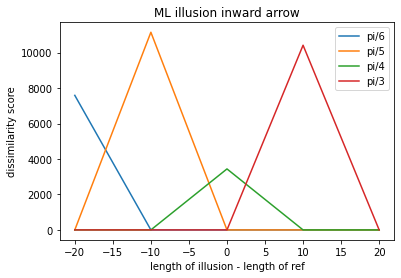

In [ ]:
angle_list = ['pi/6','pi/5','pi/4','pi/3']
for i in range(len(dissimilarity_score_mat_all)):
  plt.plot(np.linspace(-20,20,5), dissimilarity_score_mat_all[i],label=angle_list[i])
  plt.legend(loc='upper right')
  plt.xlabel('length of illusion - length of ref')
  plt.ylabel('dissimilarity score')
  plt.title('ML illusion inward arrow')

Text(0.5, 1.0, 'ML illusion inward arrow')

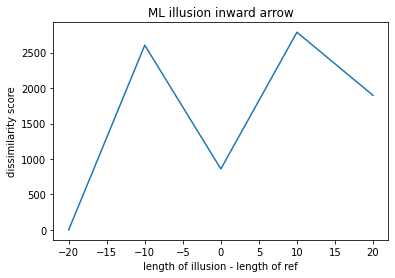

In [ ]:
plt.plot(np.linspace(-20,20,5), mean_ds)
plt.xlabel('length of illusion - length of ref')
plt.ylabel('dissimilarity score')
plt.title('ML illusion inward arrow')